In [1]:
from DP_GP import core

import pandas as pd

import GPy
from DP_GP import cluster_tools
import numpy as np
from collections import defaultdict
import collections



In [2]:
# for plotting
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.lines as mlines

%matplotlib inline
%config InlineBackend.figure_format = 'retina'#'svg'
matplotlib.rcParams['figure.figsize'] =  (8,5)
matplotlib.rcParams['text.usetex'] = False
matplotlib.rcParams['font.size'] = 10
matplotlib.rcParams['font.family'] = 'sans-serif'

In [3]:
from datetime import date

today = date.today()
print("Today's date:", today)

("Today's date:", datetime.date(2021, 1, 21))


In [5]:
#  expression is the datefile, where row = genes, col = time points,
expression = 'DPGP_test.txt'

# Set output prefix, if folder not existing, make one
output_path_prefix='DPGP_testOutput_' + str(today) + '/'

import os
if not os.path.exists(output_path_prefix):
    os.makedirs(output_path_prefix)

optimal_clusters_out = output_path_prefix + "optimal_clusters.txt"


In [6]:
output_path_prefix

'DPGP_testOutput_2021-01-21/'

In [7]:
expression

'DPGP_test.txt'

In [8]:

# Read in gene expression matrix
# Note: if your column name is real time, make sure to set: true_times = True
gene_expression_matrix, gene_names, t, t_labels = \
                                    core.read_gene_expression_matrices([expression],
                                                                       true_times=True,
                                                                        unscaled=False,
                                                                        do_not_mean_center = False)



gene_expression_df = pd.DataFrame(gene_expression_matrix,index=gene_names,columns=t_labels)

gene_expression_df.shape

(1000, 12)

In [9]:
gene_expression_df.head()

1         4         8        25        49        73  \
ENSG00000172867 -1.474952 -1.673963 -1.639330 -0.423959 -0.062083  0.382339   
ENSG00000105143 -1.291832 -1.142355 -1.470621 -1.206604 -0.583602  0.241187   
ENSG00000105141 -1.435290 -1.618220 -1.494472 -0.728970 -0.144347  0.329833   
ENSG00000162399 -1.434535 -1.550992 -1.372059 -1.003226 -0.223445  0.475460   
ENSG00000100341 -1.114165 -1.275707 -1.631168 -1.293869 -0.164551  0.203648   

                       97       121       124       128       145       169  
ENSG00000172867  0.755734  0.870332  0.825010  0.865555  0.842121  0.733196  
ENSG00000105143  0.757004  0.811826  0.990496  0.950195  1.008078  0.936229  
ENSG00000105141  0.740507  0.651320  0.863477  0.810662  1.022202  1.003298  
ENSG00000162399  0.779702  0.840152  0.856737  0.822454  0.974566  0.835186  
ENSG00000100341  0.649196  0.897400  0.907095  0.825304  1.040124  0.956693

# Clustering time-series

This will take a while: ~2 hrs for 10k genes on my laptop


In [10]:
# Run Gibbs Sampler; Usually I used:
# max_num_iterations=1000, 
# burnIn_phaseI=240, 
# burnIn_phaseII=480,
# Can reduce max_num_iterations,burnIn_phaseI,burnIn_phaseII to save time.

GS = core.gibbs_sampler(gene_expression_matrix, t, 
                        max_num_iterations=500, 
                        burnIn_phaseI=120, 
                        burnIn_phaseII=240,
                        fast= True)

sim_mat, all_clusterings, sampled_clusterings, log_likelihoods, iter_num = GS.sampler()
sampled_clusterings.columns = gene_names
all_clusterings.columns = gene_names


Initializing one-gene clusters...
Sizes of clusters = [0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

Sizes of clusters = [0, 0, 0, 0, 48, 79, 14, 16, 57, 9, 233, 23, 19, 11, 44, 78, 91, 24, 24, 13, 112, 42, 22, 13, 20, 1, 7]
Sizes of clusters = [0, 0, 0, 0, 50, 56, 12, 9, 80, 9, 220, 21, 20, 5, 31, 83, 130, 12, 21, 19, 112, 38, 24, 15, 25, 1, 7]
Past burn-in phase II, start taking samples...
Sizes of clusters = [0, 0, 0, 0, 44, 40, 13, 7, 70, 8, 218, 24, 16, 8, 45, 86, 152, 14, 24, 18, 106, 44, 19, 14, 22, 1, 7]
Sample number: 1
Sizes of clusters = [0, 0, 0, 0, 37, 27, 11, 12, 74, 9, 220, 17, 12, 4, 34, 92, 164, 13, 23, 21, 105, 57, 24, 15, 22, 7]
Sizes of clusters = [0, 0, 0, 0, 27, 10, 10, 7, 85, 9, 210, 11, 11, 1, 41, 99, 186, 5, 20, 20, 112, 64, 21, 21, 20, 9, 1]
Sizes of clusters = [0, 0, 0, 0, 36, 5, 10, 85, 8, 212, 13, 9, 44, 98, 187, 17, 25, 105, 69, 28, 18, 22, 8, 1]
Sample number: 2
Sizes of clusters = [0, 0, 0, 0, 30, 3, 12, 84, 9, 206, 20, 12, 45, 97, 202, 15, 18, 106, 63, 28, 18, 24, 7, 1]
Sizes of clusters = [0, 0, 0, 0, 30, 1, 15, 83, 9, 208, 10, 8, 54, 109, 200, 16, 16

 /opt/anaconda3/envs/py2/lib/python2.7/site-packages/paramz/transformations.py:119: RuntimeWarning:overflow encountered in expm1
 /opt/anaconda3/envs/py2/lib/python2.7/site-packages/paramz/transformations.py:121: RuntimeWarning:overflow encountered in expm1


Sample number: 9
Sizes of clusters = [0, 0, 0, 0, 21, 13, 91, 9, 217, 14, 39, 28, 135, 189, 2, 9, 61, 50, 36, 23, 28, 34, 1]
Gibbs sampling iteration 50
Sizes of clusters = [0, 0, 0, 0, 21, 17, 100, 8, 213, 12, 40, 18, 132, 191, 3, 8, 51, 50, 33, 22, 30, 50, 1]
Maximum number of Gibbs sampling iterations: 50; terminating Gibbs sampling now.


## Save the output log_likelihoods and other results if needed. 

Note the clustering saved here are clusters from each iteratation. 
Can skip this step here, as later we will save the optimal clustering
Also note that similarity matrix dataframe can be too big to save as dataframe; can just save matrix if needed for plotting.


In [11]:
# core.save_posterior_similarity_matrix(sim_mat, gene_names, output_path_prefix)
# core.save_clusterings(sampled_clusterings, output_path_prefix)
core.save_log_likelihoods(log_likelihoods, output_path_prefix)

## Select best clustering by maximum a posteriori estimate

In [12]:
optimal_clusters = cluster_tools.best_clustering_by_log_likelihood(np.array(sampled_clusterings), 
                                                                   log_likelihoods)

# combine gene_names and optimal_cluster info
optimal_cluster_labels = defaultdict(list)
optimal_cluster_labels_original_gene_names = defaultdict(list)
for gene, (gene_name, cluster) in enumerate(zip(gene_names, optimal_clusters)):
    optimal_cluster_labels[cluster].append(gene)
    optimal_cluster_labels_original_gene_names[cluster].append(gene_name)



Number of clusters

In [13]:
len(optimal_cluster_labels_original_gene_names)

19

Check how many genes in each cluster

In [14]:
for k,v in optimal_cluster_labels_original_gene_names.iteritems():
    print('Cluster ', k,':',len(v))

('Cluster ', 1, ':', 217)
('Cluster ', 2, ':', 91)
('Cluster ', 3, ':', 189)
('Cluster ', 4, ':', 21)
('Cluster ', 5, ':', 135)
('Cluster ', 6, ':', 61)
('Cluster ', 7, ':', 36)
('Cluster ', 8, ':', 13)
('Cluster ', 9, ':', 28)
('Cluster ', 10, ':', 39)
('Cluster ', 11, ':', 9)
('Cluster ', 12, ':', 50)
('Cluster ', 13, ':', 2)
('Cluster ', 14, ':', 34)
('Cluster ', 15, ':', 14)
('Cluster ', 16, ':', 28)
('Cluster ', 17, ':', 9)
('Cluster ', 18, ':', 1)
('Cluster ', 19, ':', 23)


Save optimal clusters, which can be found in the file: optimal_clusters.txt

In [15]:

cluster_tools.save_cluster_membership_information(optimal_cluster_labels_original_gene_names, 
                                                  optimal_clusters_out)

Rearrange the cluster label, so that Cluster 1 is the lagest cluster;
Save the sorted cluster in optimal_clusters_sorted.txt

In [16]:
from collections import OrderedDict
# Rearrange the cluster label
c_len = defaultdict(list)
for k,item in optimal_cluster_labels.iteritems():
    c_len[k] = len(item)
c_len = pd.DataFrame.from_dict(c_len,orient='index',columns=['size'])
c_len.sort_values('size',ascending=False,inplace=True)

optimal_cluster_labels_sorted = defaultdict(list)
optimal_cluster_labels_original_gene_names_sorted = defaultdict(list)
for i,(cl,si) in enumerate(c_len.iterrows()):
    optimal_cluster_labels_sorted[i+1] = optimal_cluster_labels[cl]
    optimal_cluster_labels_original_gene_names_sorted[i+1] = optimal_cluster_labels_original_gene_names[cl]

In [17]:
# output filename:
optimal_clusters_out_sorted = output_path_prefix + 'optimal_clusters_sorted.txt'

# save the sorted output
cluster_tools.save_cluster_membership_information(optimal_cluster_labels_original_gene_names_sorted, 
                                                  optimal_clusters_out_sorted)

Can uncomment the following if want to save models and all the output so far (using pickle). 

In [18]:
# import pickle
# with open(output_path_prefix + 'OutputForOptimizeGPModel.pickle', 'wb') as f:
#             pickle.dump([t, t_labels, gene_names, gene_expression_matrix,fast, sim_mat, 
#                          optimal_cluster_labels,
#                          optimal_cluster_labels_sorted, 
#                          optimal_cluster_labels_original_gene_names,
#                          optimal_cluster_labels_original_gene_names_sorted,
#                          all_clusterings, sampled_clusterings, log_likelihoods, iter_num],f)

Can uncomment the following and start running from here if you had running the modelling before and now want to load previously saved results:

In [19]:
# # If loading previously clustered results:
# import pickle
# fname = 'DPGPoutput/Counts_GPFilter_UVB/OutputForOptimizeGPModel.pickle'
# f = open(fname,'r')
# [t, t_labels, gene_names, gene_expression_matrix,fast, sim_mat, 
#                          optimal_cluster_labels,
#                          optimal_cluster_labels_sorted, 
#                          optimal_cluster_labels_original_gene_names,
#                          optimal_cluster_labels_original_gene_names_sorted,
#                          all_clusterings, sampled_clusterings, log_likelihoods, iter_num] = \
#                           pickle.load(f)

## Optimize GP model for best clustering

In [20]:


optimal_clusters_GP_sorted = {}
fast = True

for i,(cluster, genes) in enumerate(optimal_cluster_labels_sorted.iteritems()):
    if (i<30):
        optimal_clusters_GP_sorted[cluster] = core.dp_cluster(members=genes, 
                                                       X=np.vstack(t), 
                                                       Y=np.array(np.mat(gene_expression_matrix[genes,:])).T,
                                                       fast = fast)
        optimal_clusters_GP_sorted[cluster] = optimal_clusters_GP_sorted[cluster].update_cluster_attributes(gene_expression_matrix)



In [21]:
## Sample code from github: Use this if you want to predict with GP model

# def draw_samples_from_cluster_GP(cluster_GP, n_samples=1):
#     samples = np.random.multivariate_normal(cluster_GP.mean, cluster_GP.covK, n_samples)    
#     return samples

# def predict_new_y_from_cluster_GP(cluster_GP, new_x):
#     next_time_point = np.vstack([cluster_GP.t, new_x])
#     mean, var = cluster_GP.model._raw_predict(next_time_point)
#     y, y_var = float(mean[-1]), float(var[-1])
#     return y, y_var

# draw_samples_from_cluster_GP(optimal_clusters_GP[1])
# predict_new_y_from_cluster_GP(optimal_clusters_GP[2], new_x=7.2)

# Plot

In [22]:
from DP_GP import plot

Match time-point with true label: day-hr (This is for my specific project; optional)

In [23]:
t

array([  1.,   4.,   8.,  25.,  49.,  73.,  97., 121., 124., 128., 145.,
       169.])

In [24]:
t_labels_day = ['D1-1h',
                 '   4h',
                 '   8h',
                 'D2-1h',
                 'D3-1h',
                 'D4-1h',
                 'D5-1h',
                 'D6-1h',
                 '   4h',
                 '   8h',
                 'D7-1h',
                 'D8']

In [25]:
def adjust_spines(ax, spines):
    ''' 
    see matplotlib examples:
    http://matplotlib.org/examples/pylab_examples/spine_placement_demo.html
    ''' 
    for loc, spine in ax.spines.items():
        if loc in spines:
            spine.set_position(('outward', 10))  # outward by 10 points
        else:
            spine.set_color('none')  # don't draw spine
    
    # turn off ticks where there is no spine
    if 'left' in spines:
        ax.yaxis.set_ticks_position('left')
    else:
        # no yaxis ticks
        ax.yaxis.set_ticks([])
    
    if 'bottom' in spines:
        ax.xaxis.set_ticks_position('bottom')
    else:
        # no xaxis ticks
        ax.xaxis.set_ticks([])

In [26]:
#  This is copied from package source code; I found it more convinent to use like this than calling from package
def plot_cluster_gene_expression(clusters, gene_expression_matrix, t, t_labels, time_unit, output_path_prefix, plot_types, unscaled, do_not_mean_center):
    ''' 
    Plot gene expression over a time course with a panel for each cluster. Each panel contains
    transparent red lines for the expression of each individual gene within the cluster, the
    cluster mean, and a ribbon twice the standard deviation about the cluster mean.  This is
    essentially a wrapper function for GPy.plotting.matplot_dep.base_plots.gpplot.
    
    :param clusters: dictionary of dp_cluster objects
    :type clusters: dict
    :param gene_expression_matrix: expression over timecourse of dimension |genes|x|timepoints|
    :type gene_expression_matrix: pandas dataframe
    :param t: sampled timepoints
    :type t: numpy array of floats
    :param time_unit: time units in reference to t, e.g. 'days','hr.','min.','sec.'
    :type t: str
    :param output_path_prefix: absolute path to output
    :type output_path_prefix: str
    :param plot_types: plots to be generated, e.g. ['png','pdf','svg'] or simply ['png']
    :type plot_types: list of strings
    
    :rtype: None (output is saved to file(s))
    
    ''' 
    # cluster IDs:
    IDs = sorted(clusters)
    # one panel per cluster:
    total_subplots = len(IDs)
    # max of 6 panels per figure or page
    subplots_per_fig = 6
    total_no_of_figs = int(np.ceil(total_subplots/float(subplots_per_fig)))
    total_cols = 3 # generate this many columns of subplots in the figure.
    total_rows = np.ceil(subplots_per_fig/total_cols) # each figure generate will have this many rows.
    IDs_split = [IDs[i:i+subplots_per_fig] for i in xrange(0, len(IDs), subplots_per_fig)]
    index = 1
    for c, IDs in enumerate(IDs_split):
        fig = plt.figure(num=None, figsize=(12,8), dpi=200, facecolor='w', edgecolor='k') #figsize=(12,8),
        for i, ID in enumerate(IDs):
            ax = fig.add_subplot(total_rows, total_cols, i+1)
            # create a range of values at which to evaluate the covariance function
            Xgrid = np.vstack(np.linspace(min(t), max(t), num=500))
            # calculate mean and variance at grid of x values
            mu, v = clusters[ID].model.predict(Xgrid, full_cov=False, kern=clusters[ID].model.kern)
            mu = np.hstack(mu.mean(axis=1))
            v = v[:,0]
            GPy.plotting.matplot_dep.base_plots.gpplot(Xgrid, mu, mu - 2*v**(0.5),  mu + 2*v**(0.5), ax=ax)
            ax.set_xlim((min(t),max(t)))
            if ( not unscaled ) and ( not do_not_mean_center ) :
                ax.set_ylim((-3,3))
            
            # plot an x-axis at zero
            plt.axhline(0, color='black', ls='--', alpha=0.5)
            # plot the expression of each gene in the cluster
            for gene in list(clusters[ID].members):
                ax.plot(t, np.array(gene_expression_matrix.ix[gene]), color='red', alpha=0.05)
            
            # plot mean expression of cluster
            ax.plot(Xgrid, mu, color='blue')
            # create legend
            light_blue_patch = mpatches.Rectangle([0, 0], 1, 1, facecolor='#33CCFF', edgecolor='blue', lw=1, alpha=0.3)
            red_line = mlines.Line2D([], [], color='red', label='individual gene trajectory', alpha=0.2)
            ax.legend([ax.lines[0], light_blue_patch, red_line], \
                      ['cluster mean', u'cluster mean \u00B1 2 x std. dev.', 'individual gene trajectory'], 
                      loc=4, frameon=False, prop={'size':6})
            # prettify axes
            adjust_spines(ax, ['left', 'bottom'])
            # label x-axis
            if time_unit == '':
                ax.set_xlabel("Time")
            else:
                ax.set_xlabel("Time in %s"%(time_unit))
            ax.set_xticks(t)
            ax.set_xticklabels(t_labels,rotation=90,fontsize='xx-small')
            ax.set_ylabel('Gene expression')
            ax.set_title('Cluster %s (N=%d)'%(index,len(clusters[ID].members)) )
            index+=1
        
        plt.tight_layout()
        
        for plot_type in plot_types:
            plt.savefig(output_path_prefix + '_gene_expression_fig_' + str(c+1) + '.' + plot_type)

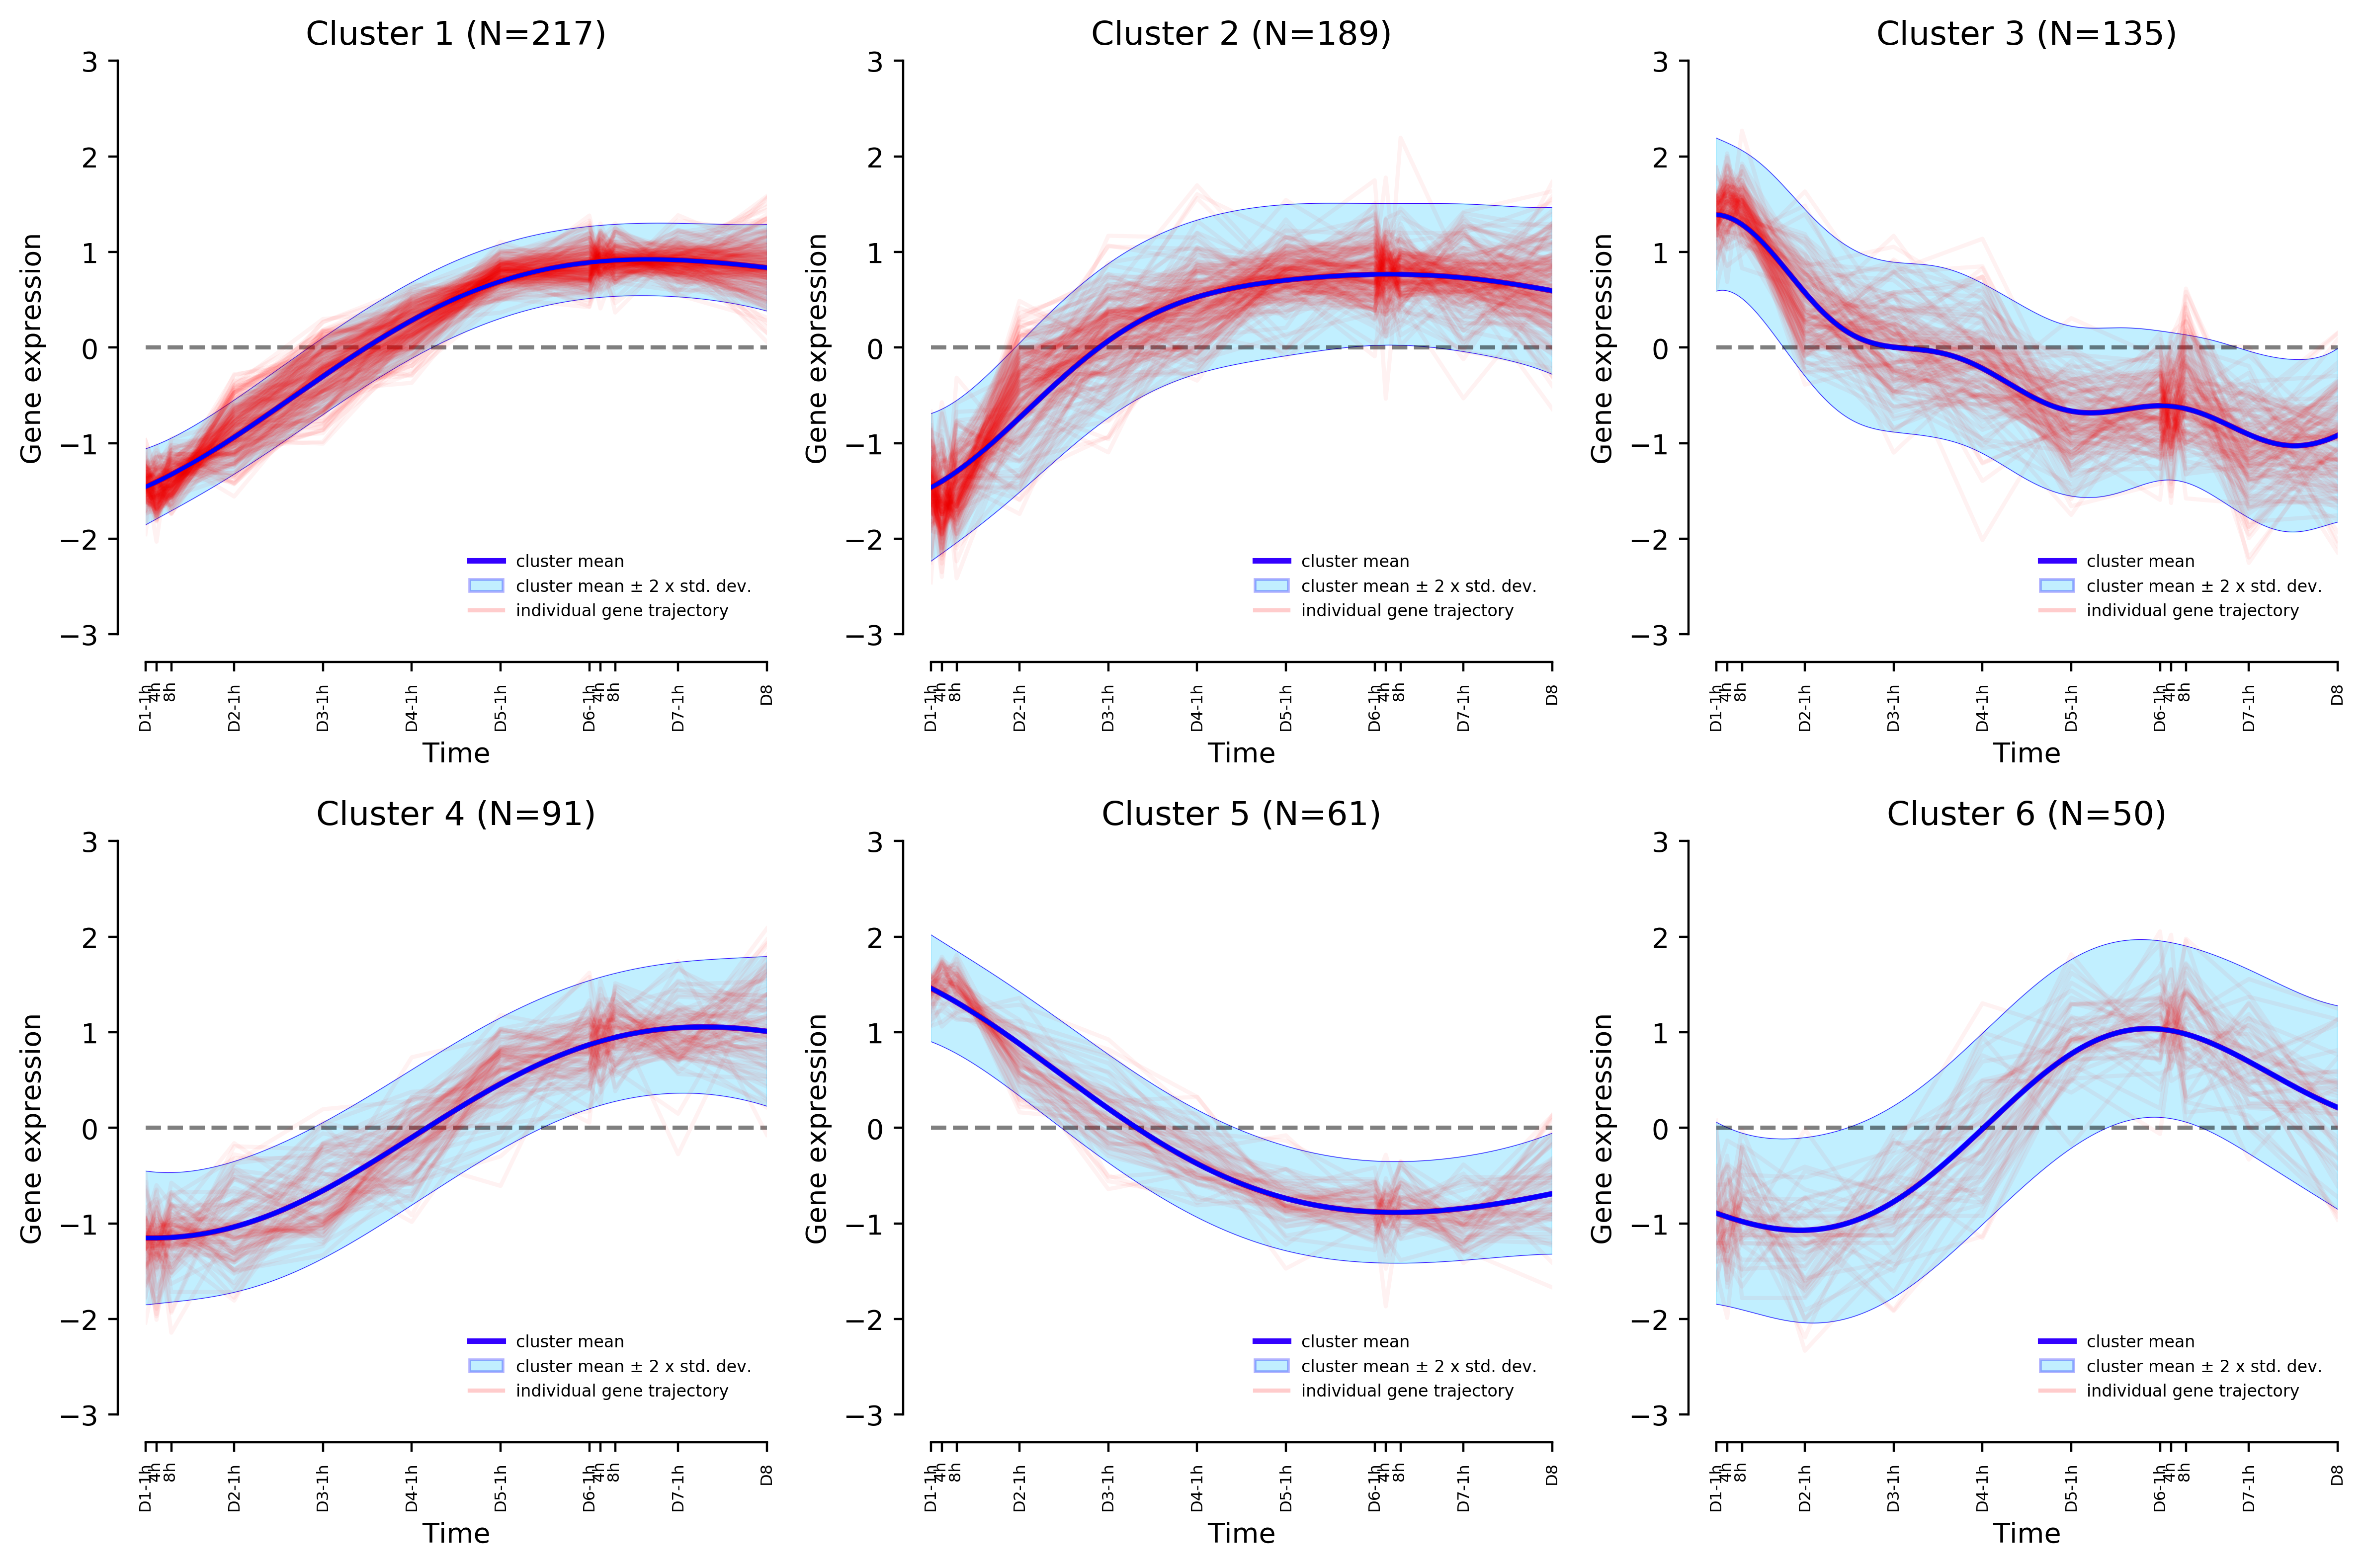

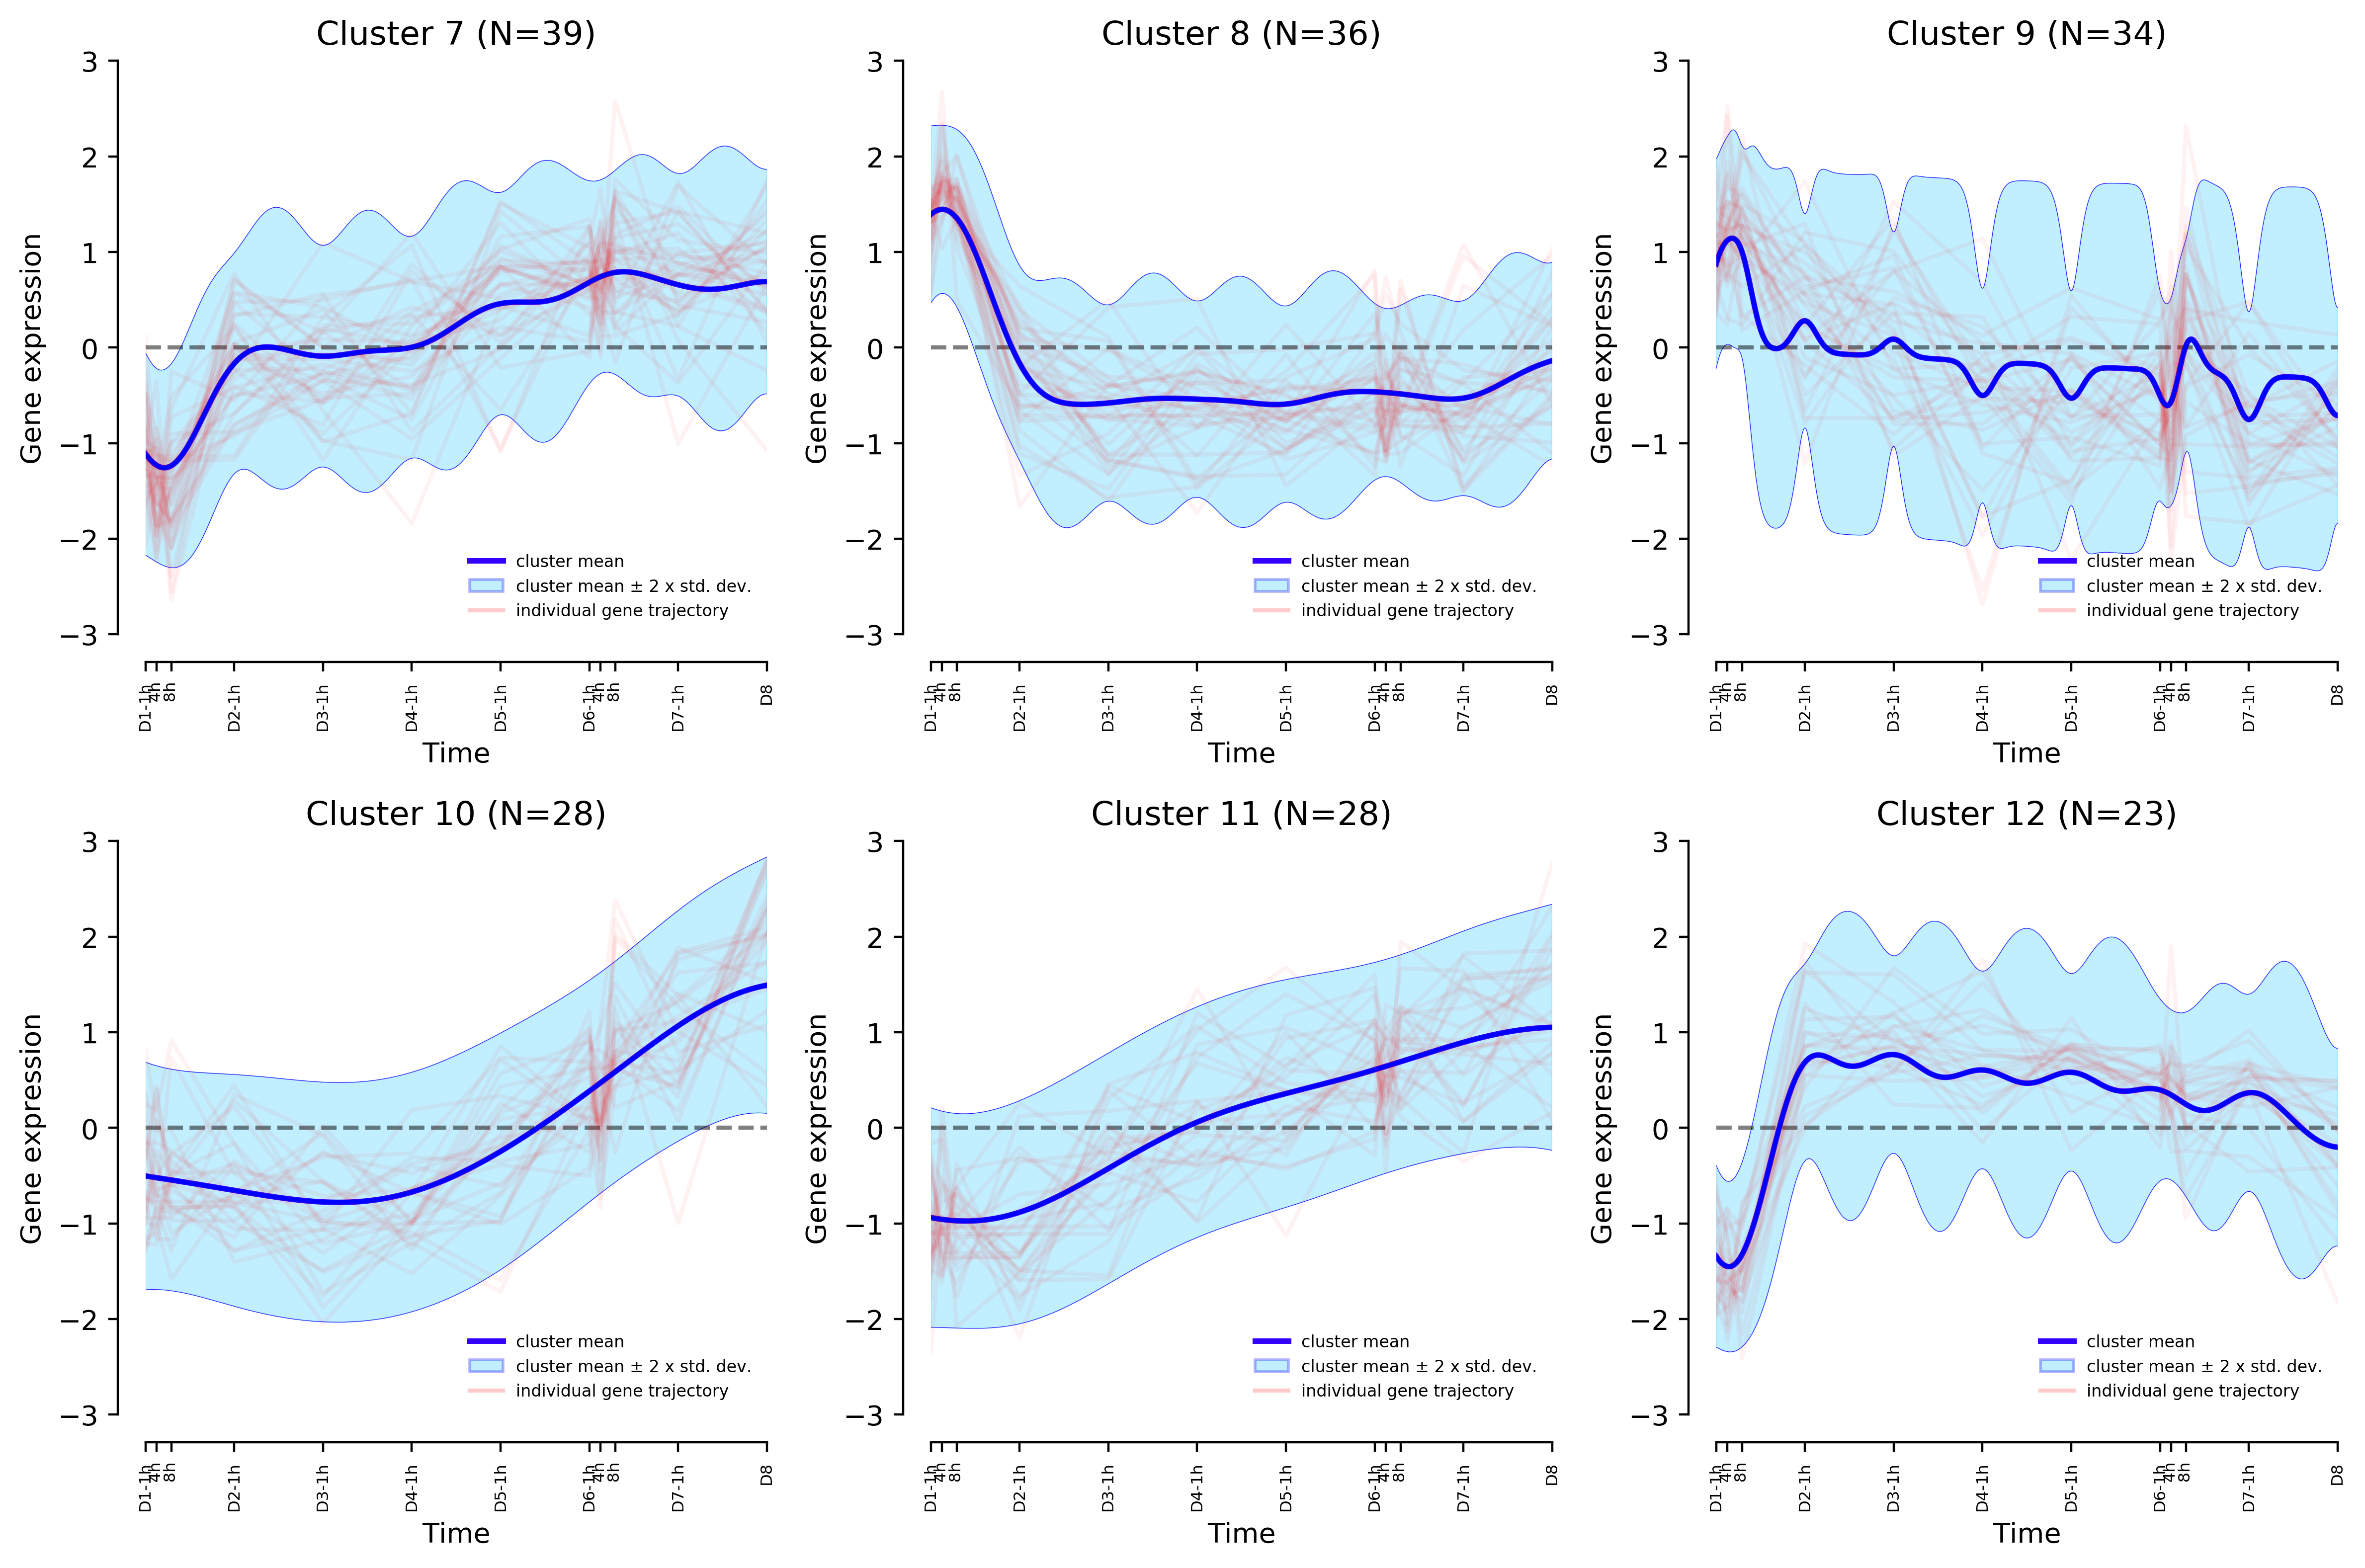

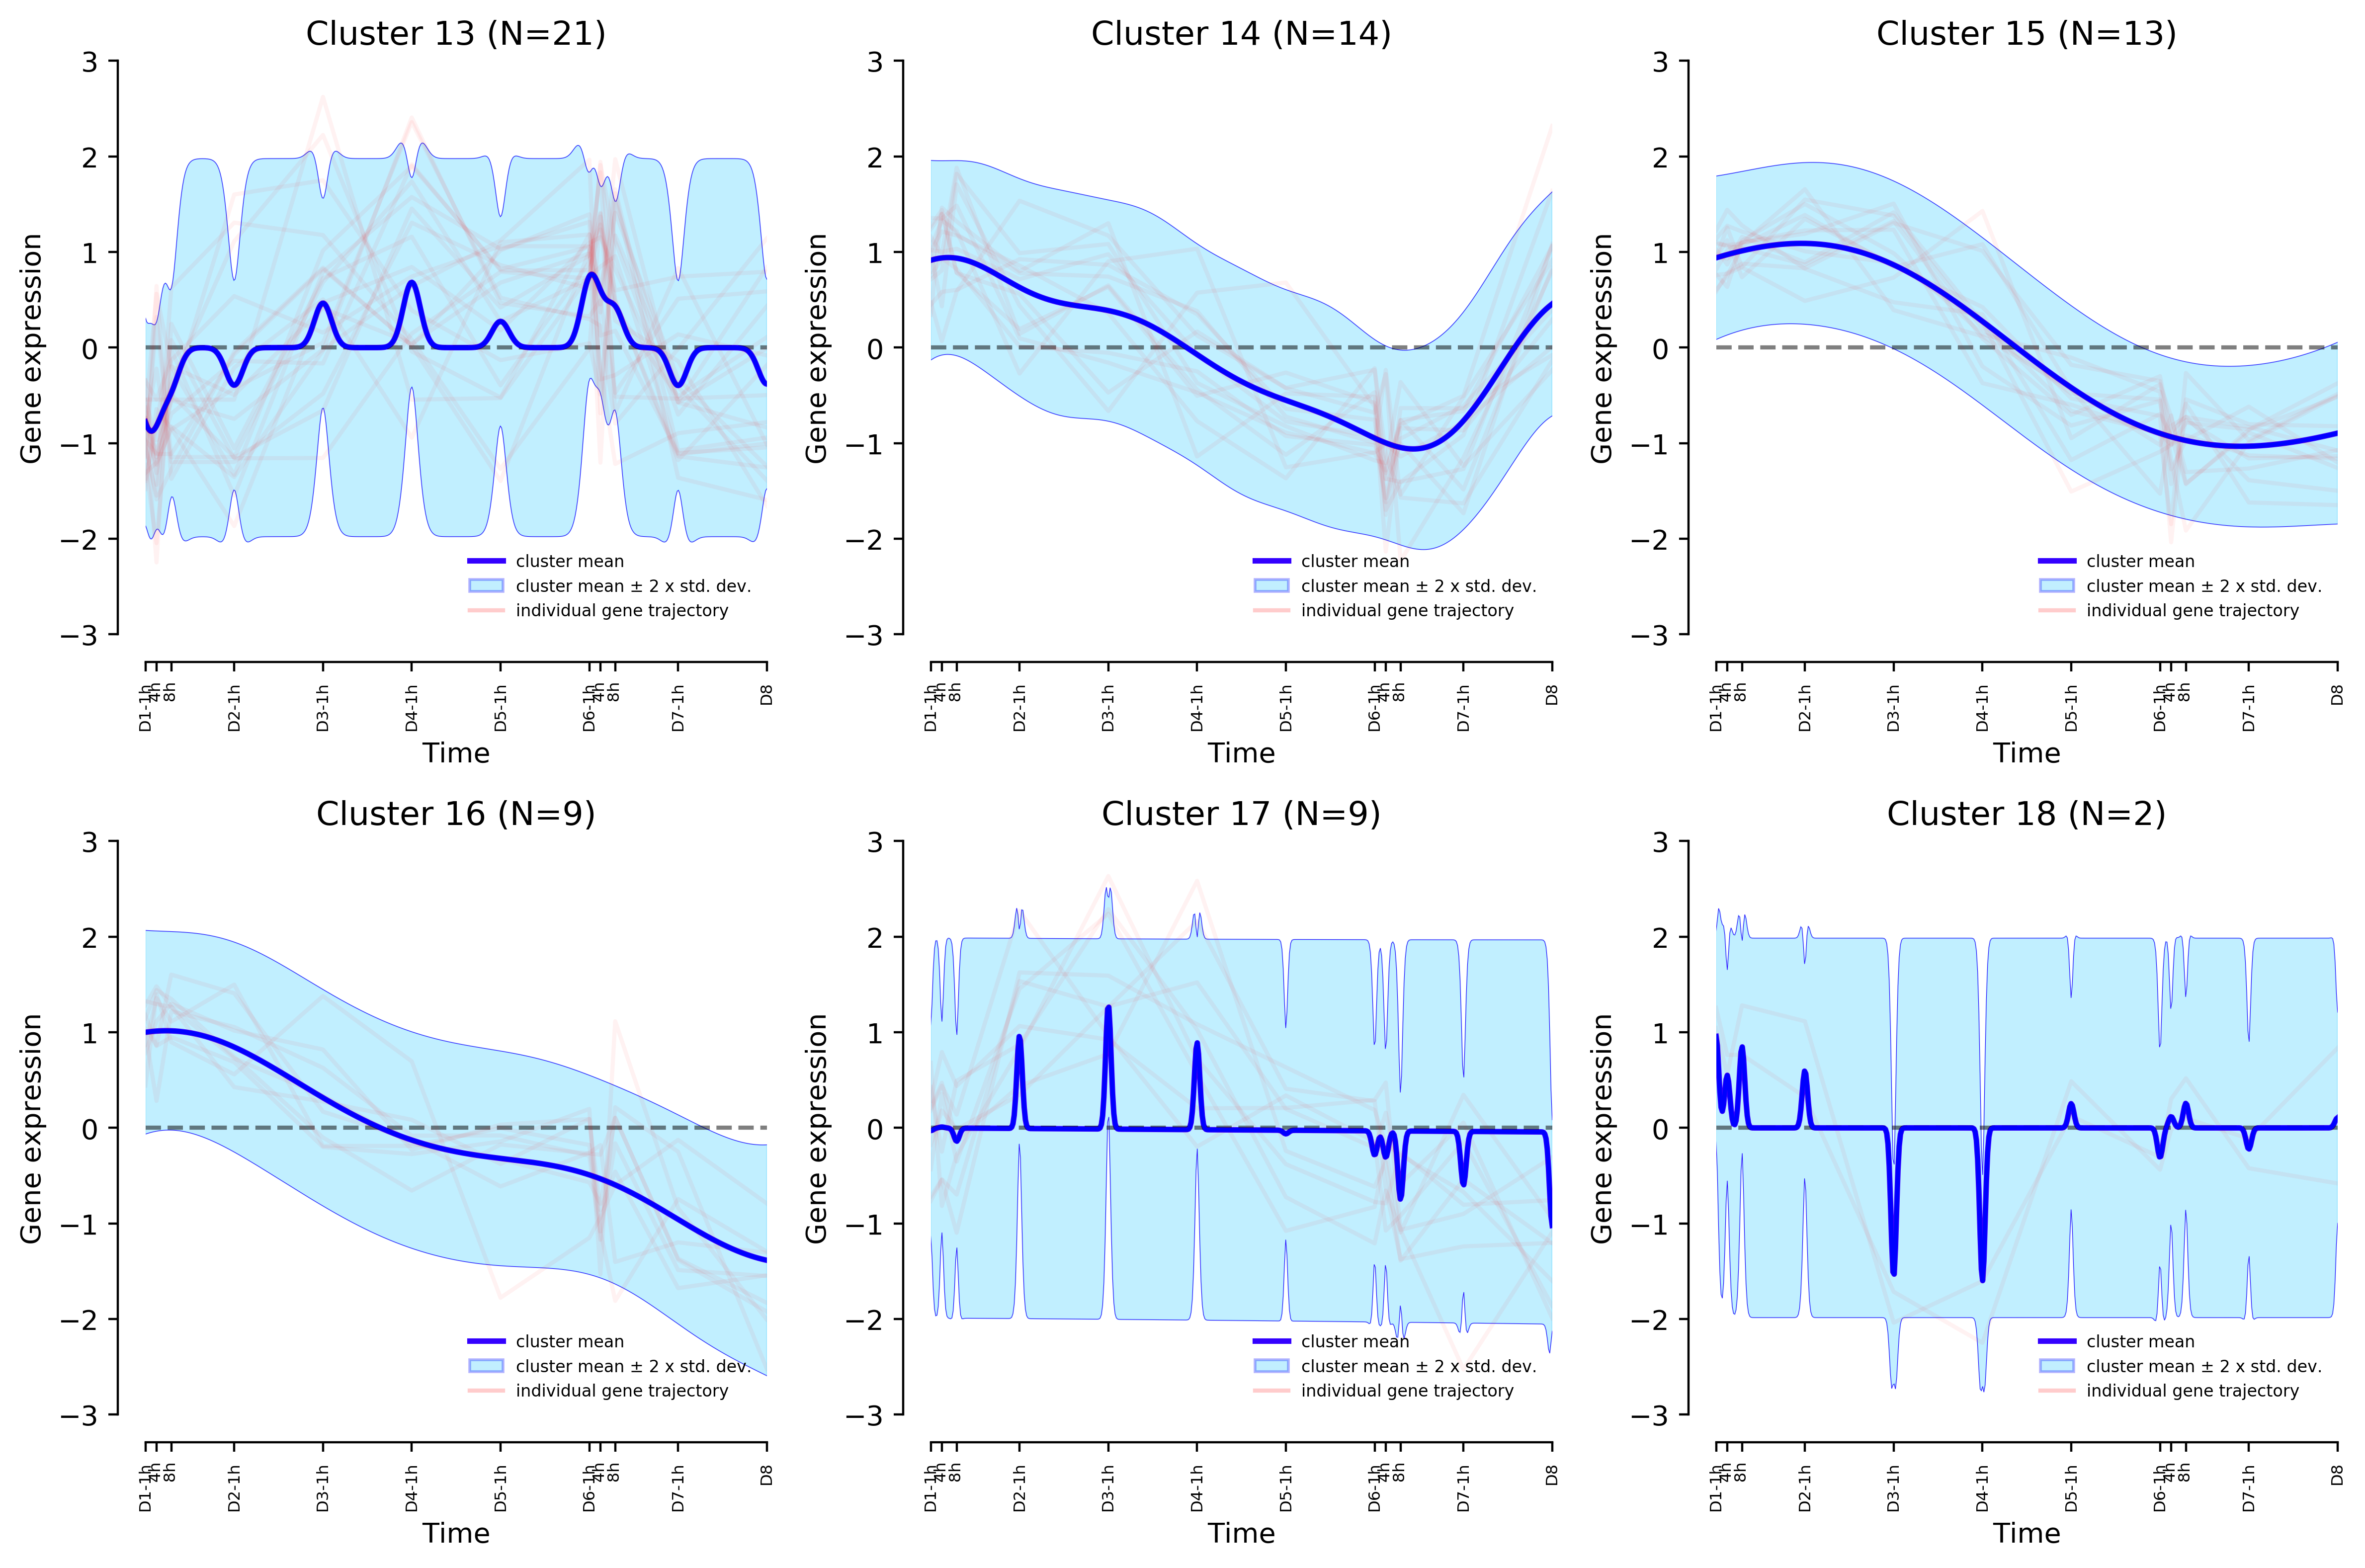

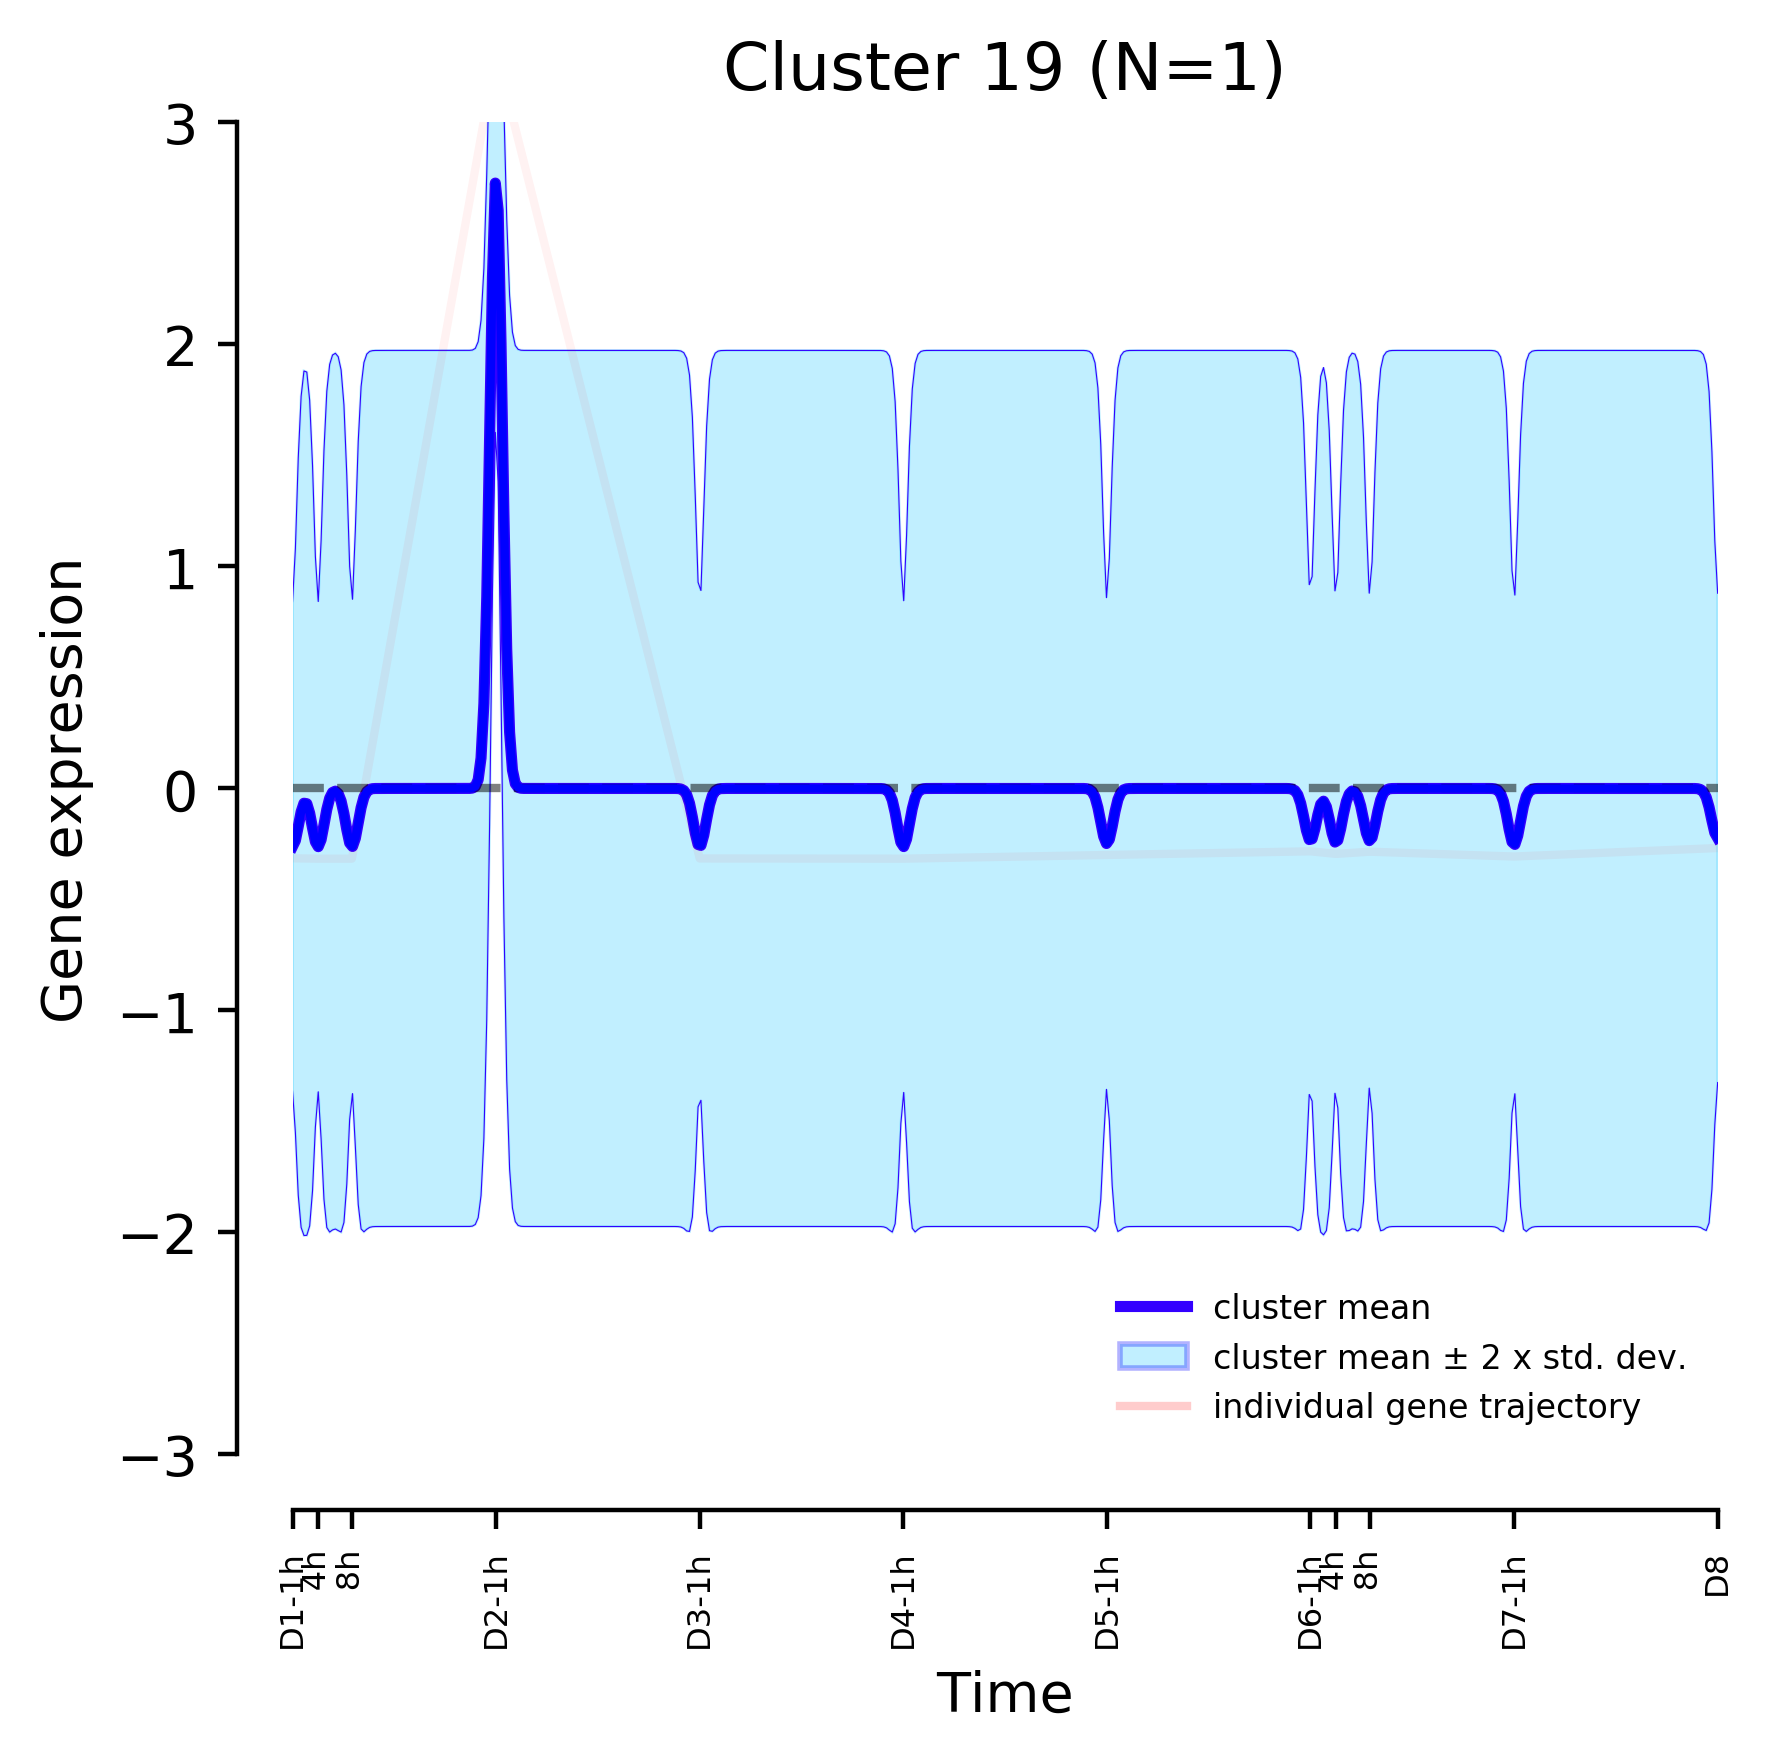

In [27]:
# plot clustering results; Note here, you need to pass dataframe gene_expression_df for plotting
plot_cluster_gene_expression(optimal_clusters_GP_sorted, 
                                  gene_expression_df, 
                                  t, 
                                  t_labels_day,
                                  time_unit = '', 
                                  output_path_prefix = output_path_prefix,  
                                  plot_types=['png'],
                                  unscaled = False, 
                                  do_not_mean_center = False
                                 )
